In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

None
None
None
None
None
None


QObject::moveToThread: Current thread (0x55dbdf002ce0) is not the object's thread (0x55dbdf54d1e0).
Cannot move to target thread (0x55dbdf002ce0)

QObject::moveToThread: Current thread (0x55dbdf002ce0) is not the object's thread (0x55dbdf54d1e0).
Cannot move to target thread (0x55dbdf002ce0)

QObject::moveToThread: Current thread (0x55dbdf002ce0) is not the object's thread (0x55dbdf54d1e0).
Cannot move to target thread (0x55dbdf002ce0)

QObject::moveToThread: Current thread (0x55dbdf002ce0) is not the object's thread (0x55dbdf54d1e0).
Cannot move to target thread (0x55dbdf002ce0)

QObject::moveToThread: Current thread (0x55dbdf002ce0) is not the object's thread (0x55dbdf54d1e0).
Cannot move to target thread (0x55dbdf002ce0)

QObject::moveToThread: Current thread (0x55dbdf002ce0) is not the object's thread (0x55dbdf54d1e0).
Cannot move to target thread (0x55dbdf002ce0)

QObject::moveToThread: Current thread (0x55dbdf002ce0) is not the object's thread (0x55dbdf54d1e0).
Cannot move to tar

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
[[[297.5 170.5  54.1]]]
None
[[[302.5 200.5  82.6]]]
[[[306.5 206.5  80.6]
  [307.5 184.5  65.3]]]
[[[308.5 202.5  77.4]
  [302.5 222.5  56.4]
  [301.5 183.5  59.8]
  [287.5 206.5  34.2]]]
[[[304.5 210.5  82.9]
  [303.5 189.5  64.1]]]
[[[302.5 211.5 

[[[292.5 206.5  86.2]
  [301.5 185.5  66.3]]]
[[[294.5 206.5  87.3]]]
[[[293.5 207.5  86.1]]]
[[[294.5 208.5  86.2]]]
[[[292.5 206.5  86.1]]]
[[[295.5 209.5  86.2]
  [315.5 206.5  66.3]]]
[[[294.5 208.5  87.3]]]
[[[295.5 207.5  86.2]]]
[[[294.5 209.5  86.1]]]
[[[300.5 201.5  78.5]]]
[[[296.5 208.5  86. ]]]
[[[294.5 209.5  86.2]
  [314.5 216.5  68.6]
  [309.5 190.5  64.2]]]
[[[294.5 209.5  86.2]
  [315.5 215.5  67.5]]]
[[[296.5 210.5  72.9]]]
[[[294.5 210.5  87.3]]]
[[[299.5 213.5  88.4]
  [293.5 193.5  68.5]]]
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
[[[288.5 217.5  84. ]]]
[[[281.5 221.5  86.2]]]
[[[286.5 216.5  82.9]]]
None
None
None
[[[285.5 223.5  87.3]]]
[[[279.5 223.5  84. ]]]
None
None
None
None
None
None
None
None
None
None
None
None
None
[[[280.5 210.5  85.1]]]
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


[[[322.5 205.5  75.1]
  [336.5 220.5  56.4]]]
[[[321.5 197.5  68.6]]]
None
[[[323.5 210.5  76.3]]]
[[[325.5 214.5  77.4]]]
[[[327.5 217.5  77.3]]]
[[[328.5 219.5  77.2]]]
[[[328.5 218.5  77.4]]]
None
[[[326.5 213.5  88.4]]]
[[[329.5 225.5  78.3]
  [341.5 209.5  85.1]]]
None
None
None
[[[331.5 224.5  75.2]]]
[[[333.5 230.5  77.4]]]
[[[331.5 228.5  77.4]]]
None
None
None
None
[[[338.5 236.5  79.6]]]
None
[[[335.5 231.5  76.2]]]
[[[333.5 235.5  80.5]]]
[[[335.5 227.5  67.5]]]
[[[336.5 235.5  79.6]]]
[[[334.5 234.5  79.6]]]
[[[337.5 236.5  78.5]]]
None
None
None
[[[336.5 242.5  80.7]]]
[[[340.5 242.5  79.6]]]
None
None
None
[[[340.5 240.5  78.5]]]
[[[340.5 240.5  77.4]]]
[[[338.5 241.5  78.5]]]
None
None
None
None
[[[344.5 239.5  73. ]]]
None
[[[339.5 239.5  78.4]]]
[[[339.5 238.5  77.4]]]
[[[339.5 238.5  78.5]]]
[[[338.5 238.5  78.5]
  [349.5 256.5  89.5]]]
None
[[[340.5 237.5  77.4]]]
[[[338.5 237.5  78.5]]]
None
None
None
[[[340.5 240.5  76.3]]]
[[[337.5 231.5  75.2]]]
None
None
[[[337.

None
None
None
None
None
None
None
None
None
None
None
None
None
[[[269.5 239.5  43.8]]]
None
None
None
None
None
[[[259.5 256.5  54. ]]]
[[[261.5 251.5  48.4]]]
[[[262.5 252.5  51.7]]]
[[[261.5 248.5  48.5]]]
None
None
[[[263.5 256.5  54.6]]]
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

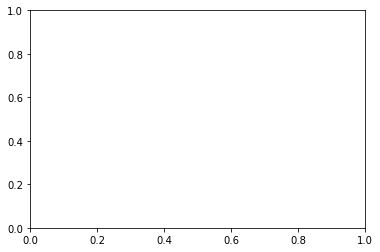

In [26]:
stream = cv2.VideoCapture(-1) # 0 means read from local camera.
if (stream.isOpened()==False):
    print("Error opeining video stream")
    
prev_frame_time = 0
new_frame_time  = 0

circles = []

## Setting up Pyplot subplot for later use

while(stream.isOpened()):
    try: 
        ret, frame = stream.read()

        # gray = cv2.resize(frame, (500, 300))
        # Converts image to gray
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        ## Setting up font for FPS counte 
        font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
        # FPS timing
        new_frame_time = time.time()
        fps = 1/(new_frame_time-prev_frame_time)
        prev_frame_time = new_frame_time
        # converting the fps into integer
        fps = int(fps)
        # converting the fps to string so that we can display it on frame
        # by using putText function
        fps = str(fps)
        ## Filtering the grayscale image with canny filter
        edges = cv2.Canny(gray, 20, 200)
        circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,20,param1=10,param2=60,minRadius=25,maxRadius=100)
        print(circles)
        if circles is not None:
            Drawing_uncolored_circle=plt.Circle((circles[0], circles[1]),circles[2],fill = False,color='red')
            axes.set_aspect(1)
            axes.add_artist(Drawing_uncolored_circle)
        if ret == True:
            cv2.putText(frame, fps, (7, 70), font, 1, (255, 0, 0), 3, cv2.LINE_AA)
            cv2.imshow('Frame',edges)
            if cv2.waitKey(25) & 0xff == ord('q'):
                break
        else:
            break
    except:
        stream.release()
        cv2.destroyAllWindows()

## Release video capture object 
stream.release()
## Closes all video winwods
cv2.destroyAllWindows()


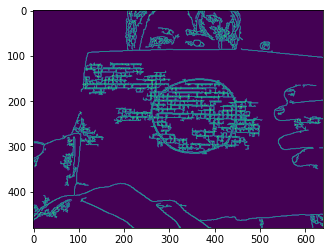

In [79]:
import cv2

cap = cv2.VideoCapture(0) # video capture source camera (Here webcam of laptop) 
ret,frame = cap.read() # return a single frame in variable `frame`
cap.release()

edges = cv2.Canny(frame, 20, 200)
plt.imshow(edges)



[[[362.5 226.5  76.3]]]


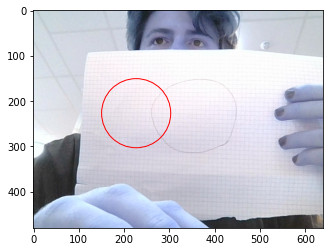

In [96]:
circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,20,param1=10,param2=60,minRadius=25,maxRadius=100)

circles_np = np.array(circles) ## ville det her hjælpe noget måske ? idk
print(circles_np)
figure, axes = plt.subplots()

Drawing_uncolored_circle=plt.Circle((circles[0,0,1],circles[0,0,1]),circles[0,0,2],fill = False,color='red')
axes.set_aspect(1)
axes.add_artist(Drawing_uncolored_circle)

plt.imshow(frame)

### TIl fremtids victor
så problemet ser ud til at være noget array fis, hvis der er mere end 1 værdi så er indexing anderlesed end hvis der er 1 værdi, der er også problemer med at den kan ikke finde ud af at lave en check om der overhovedet er nogen værdier i arrayet til at starte med ? må kunne lave et check der springer plottingen over hvis der ikke er nogen værdier i, også måske bare 2 use cases hvis der er 1 eller flere værdier